In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\navneet\amazonprime.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### The dataset has 7787 rows and 12 columns:¶


### THE INFORMATION ABOUT THE COLUMNS:¶
show_id: unique id of each show (not much of a use for us in this notebook)

type: The category of a show, can be either a Movie or a TV Show

title: Name of the show

director: Name of the director(s) of the show

cast: Name of actors and other cast of the show

country: Name of countries the show is available to watch on amazon prime

date_added: Date when the show was added on amazon prime

release_year: Release year of the show

rating: Show rating on amazon prime

duration: Time duration of the show

listed_in: Genre of the show

description: Some text describing the show

### Checking null values

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values=df.isna().sum()/len(df)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


director      30.679337
cast           9.220496
country        6.510851
date_added     0.128419
rating         0.089893
dtype: float64

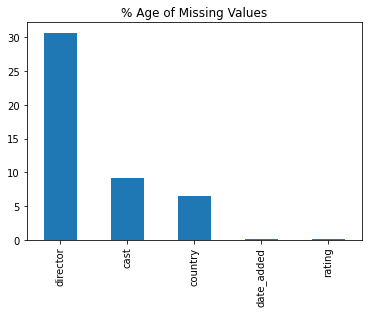

In [7]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

### Column droping and fixing on the basis of missing values
"director": Very less information-not needed for the analysis so I will be dropping this.

"cast": there are too many diferent values so I will be dropping this.

"country":Important variable hence we need to fix this.

"date_added": there are just a few cases, so lets scrap them.

"rating": there are just a few cases, so lets fix them.

"Description": Not that Important.So i will be dropping this.

### Cleaning the data

### Droping columns as mentioned above

In [8]:
df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

In [9]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,United States,1-Jan-20,2008,PG-13,123 min,Dramas


### Filling the missing values with mode 

In [10]:
df["country"]=df["country"].fillna(df["country"].mode()[0])
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [11]:
df.isnull().sum()

type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
dtype: int64

### Fixing the date_added

In [12]:
df[df.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in
258,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
549,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
2263,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
2288,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
2555,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
3374,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV
3492,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
3946,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
5137,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6065,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


### Droping these rows 

In [13]:
df=df[df["date_added"].notna()]

In [14]:
df.isna().sum() #data is cleaned

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### Adding new columns in the dataset

In [15]:
#based on data added column
df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [16]:
#based on types
df["types"]=df["type"].map({"TV Show":0,"Movie":1})

In [17]:
#based on ratings 
df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [19]:
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [20]:
#columns are added 
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,year,month,types,ratings_ages
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8,0,Adults
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",2016,12,1,Adults
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies",2018,12,1,Adults
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,1,Teens
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,2020,1,1,Teens


### Let's do some Analysis


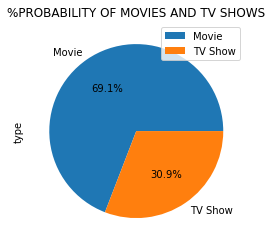

In [21]:
#on the basis of type column
df["type"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("%PROBABILITY OF MOVIES AND TV SHOWS")
plt.legend()
plt.show()

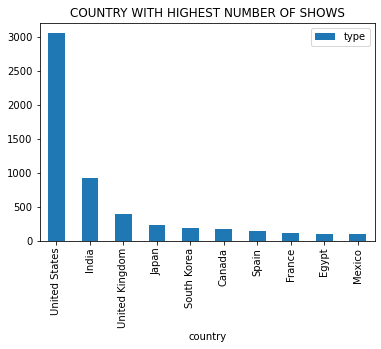

In [22]:
#A crosstab is a table showing the relationship between two or more variables. Where the table only 
#shows the relationship between two categorical variables, a crosstab is also known as a contingency table.
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=False)
countries.head(10).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()

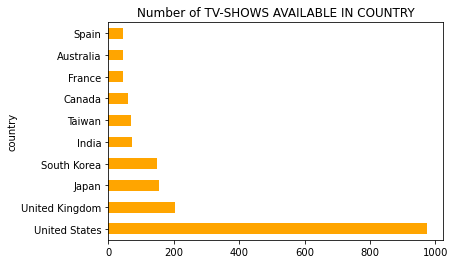

In [23]:
#groupby() function is used to split the data into groups based on some criteria. pandas objects can be split 
#on any of their axes
df.groupby(df["types"])["country"].value_counts()[0].head(10).plot(kind="barh",color="orange")
plt.title("Number of TV-SHOWS AVAILABLE IN COUNTRY")
plt.show()

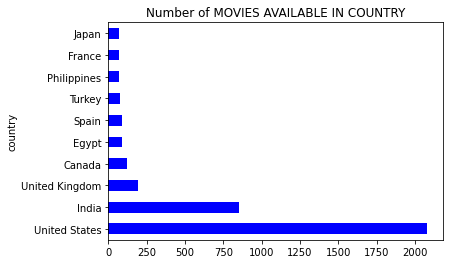

In [24]:
df.groupby(df["types"])["country"].value_counts()[1].head(10).plot(kind="barh",color="blue")
plt.title("Number of MOVIES AVAILABLE IN COUNTRY")
plt.show()

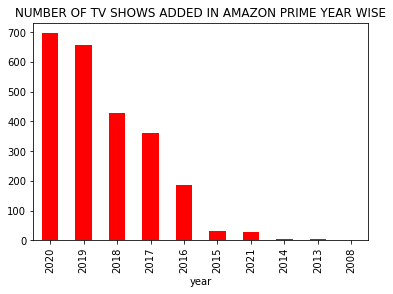

In [25]:
df.groupby(df["types"])["year"].value_counts()[0].plot(kind="bar",color="red")
plt.title("NUMBER OF TV SHOWS ADDED IN AMAZON PRIME YEAR WISE")
plt.show()

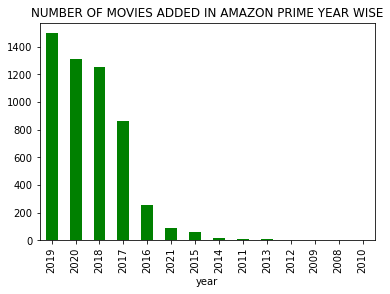

In [26]:
df.groupby(df["types"])["year"].value_counts()[1].plot(kind="bar",color="green")
plt.title("NUMBER OF MOVIES ADDED IN AMAZON PRIME YEAR WISE")
plt.show()

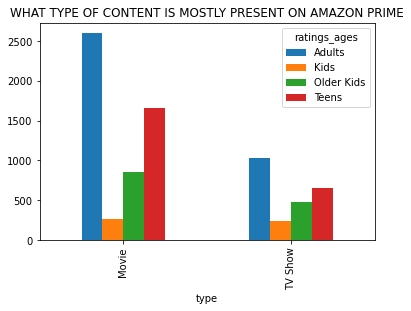

In [27]:
pd.crosstab(df["type"],df["ratings_ages"]).plot(kind="bar")
plt.title("WHAT TYPE OF CONTENT IS MOSTLY PRESENT ON AMAZON PRIME")
plt.show()

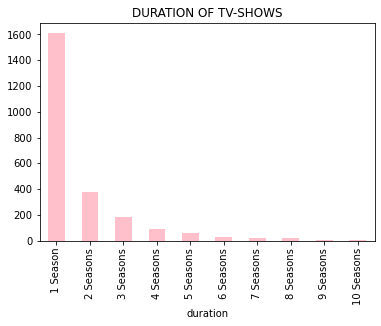

In [28]:
x=df.groupby(df["types"])["duration"].value_counts()[0]
x.head(10).plot(kind="bar",color="pink")
plt.title("DURATION OF TV-SHOWS")
plt.show()

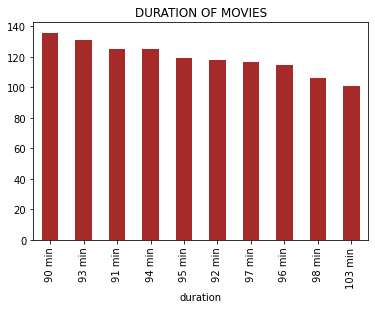

In [29]:
x=df.groupby(df["types"])["duration"].value_counts()[1]
x.head(10).plot(kind="bar",color= 'brown')
plt.title("DURATION OF MOVIES")
plt.show()

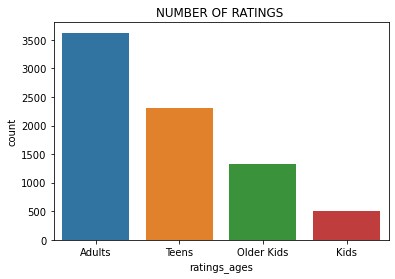

In [30]:
#on the basis of rating
sns.countplot(x="ratings_ages",data=df)
plt.title("NUMBER OF RATINGS ")
plt.show()

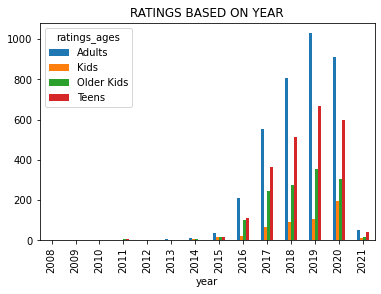

In [31]:
pd.crosstab(df["year"],df["ratings_ages"]).sort_values(by="year").plot(kind="bar")
plt.title("RATINGS BASED ON YEAR")
plt.show()


### LISTED IN - GENRE

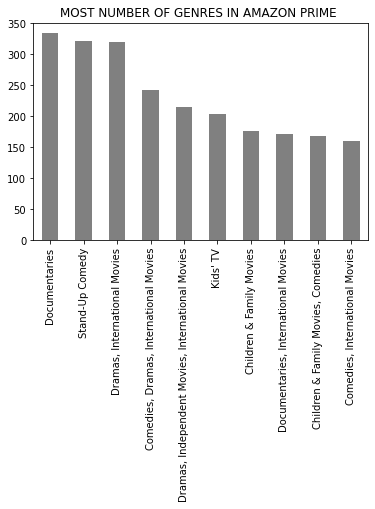

In [32]:
df["listed_in"].value_counts().head(10).plot(kind="bar",color="grey")
plt.title("MOST NUMBER OF GENRES IN AMAZON PRIME ")
plt.show()

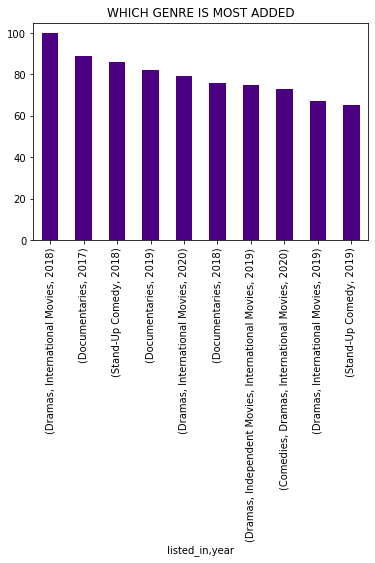

In [33]:
df.groupby(df["listed_in"])["year"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar",color='indigo')
plt.title("WHICH GENRE IS MOST ADDED")
plt.show()

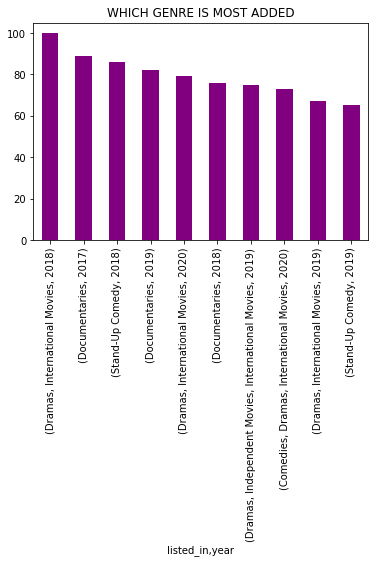

In [34]:
df.groupby(df["listed_in"])["year"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar",color='purple')
plt.title("WHICH GENRE IS MOST ADDED")
plt.show()

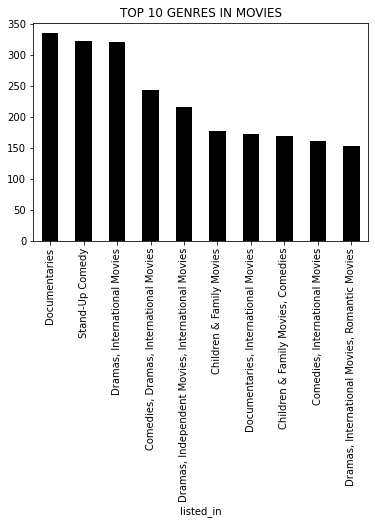

In [35]:
df.groupby(by=df["types"])["listed_in"].value_counts()[1].head(10).plot(kind="bar",color="black")
plt.title("TOP 10 GENRES IN MOVIES")
plt.show()

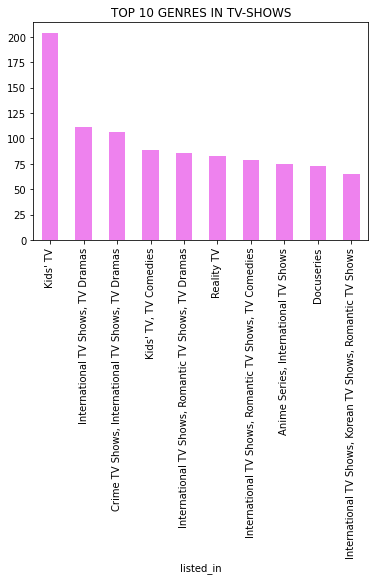

In [36]:
df.groupby(by=df["types"])["listed_in"].value_counts()[0].head(10).plot(kind="bar",color="violet")
plt.title("TOP 10 GENRES IN TV-SHOWS")
plt.show()

### summary:
- 01. 69.1% ARE MOVIES & 30.9% ARE TV-SHOWS PRESENT IN AMAZON PRIME.

- 02. US. HAS HIGHEST NUMBER OF MOVIES & TV-SHOWS AVAILABLE.

- IN 2020 MOST NUMBER OF TV-SHOWS & MOVIES WERE ADDED IN AMAZON PRIME .AROUND 700 TV-SHOWS & 1400 MOVIES.

- MOST NUMBER OF TV-SHOWS HAVE ONLY ONE SEASON.

- MOST NUMBER OF MOVIE DURATION IS 90MIN.

- HIGHEST NUMBER OF RATING IS ADULT.

- OVERALL DOCUMENTRIES GENRE IS BEING MOST WATCHED.

- IN MOVIES DOCUMENTRIES GENRE IS BEING MOST WATCHED.

- IN TV-SHOWS KIDS TV GENRE IS BEING MOST WATCHED.